In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from payment_simulator import GroupedPaymentNetwork, SimplePaymentNetwork
from payment_simulator.utils import calculate_network_params

np.random.seed(1234)

In [2]:
TOTAL_BANKS = 10
INITIAL_BANKS = 3
INCREMENT_BANKS = 4
ALPHA = 0.00001
AVG_PAYMENTS = 1000
ALLOW_SELF_LOOP = False

In [3]:
network = SimplePaymentNetwork(total_banks=TOTAL_BANKS,
                               avg_payments=AVG_PAYMENTS,
                               allow_self_loop=ALLOW_SELF_LOOP,
                               alpha=ALPHA)

network.simulate_payments(increment=INCREMENT_BANKS, init_banks=INITIAL_BANKS)

In [4]:
print("Preferential Attachement of Banks:")
print(network.h)

print("\nNetwork links:")
print(np.round(network.extract_link_matrix(prop=False).astype(int), 4))

print("\nNetwork links:")
print(np.round(network.extract_link_matrix(), 4))

assert (network.extract_link_matrix(False).sum() == TOTAL_BANKS * AVG_PAYMENTS)

Preferential Attachement of Banks:
[1.04097 1.04049 1.04016 1.02107 1.01526 1.01203 1.01103 1.01111 1.00381
 1.00407]

Network links:
[[  0 708 716 217 149  79  71  78  18  20]
 [708   0 671 241 114  86  66  80  30  17]
 [694 733   0 208 105  82  66  70  23  22]
 [209 210 223   0 124  74  69  77  21  26]
 [137 119 124 128   0  78  66  74  24  19]
 [ 92  72  85  80  86   0  74  64  21  18]
 [ 88  74  81  65  69  84   0  60  13  30]
 [ 71  88  69  93  56  79  72   0  20  21]
 [ 15  16  21  23  19  22  28  23   0  17]
 [ 27  16  23  19  35  27  27  16  27   0]]

Network links:
[[0.     0.0708 0.0716 0.0217 0.0149 0.0079 0.0071 0.0078 0.0018 0.002 ]
 [0.0708 0.     0.0671 0.0241 0.0114 0.0086 0.0066 0.008  0.003  0.0017]
 [0.0694 0.0733 0.     0.0208 0.0105 0.0082 0.0066 0.007  0.0023 0.0022]
 [0.0209 0.021  0.0223 0.     0.0124 0.0074 0.0069 0.0077 0.0021 0.0026]
 [0.0137 0.0119 0.0124 0.0128 0.     0.0078 0.0066 0.0074 0.0024 0.0019]
 [0.0092 0.0072 0.0085 0.008  0.0086 0.     0.0074 0.0

In [5]:
pd.Series(calculate_network_params(network.G))

Number of nodes       10.0
Number of links       90.0
Connectivity           1.0
Reciprocity            1.0
Average Degree (k)    18.0
Max (k-in)             9.0
Max (k-out)            9.0
dtype: float64

In [6]:
g_total_banks = 43
g_avg_payments = 25
g_alpha = 1e-5
g_bank_groups = [0.15, 0.20, 0.35, 0.30]

g_network = GroupedPaymentNetwork(
    total_banks=g_total_banks,
    bank_groups=g_bank_groups,
    avg_payments=g_avg_payments,
    alpha=g_alpha,
    allow_self_loop=ALLOW_SELF_LOOP,
)

g_network.simulate_payments(increment=5, init_banks=10)

In [7]:
print("Preferential Attachement of Banks:")
print(g_network.h)

print("\nNetwork links:")
print(np.round(g_network.extract_link_matrix(prop=False).astype(int), 4))

print("\nNetwork links:")
print(np.round(g_network.extract_link_matrix(), 4))

assert (g_network.extract_link_matrix(False).sum() == g_total_banks * g_avg_payments)

Preferential Attachement of Banks:
[1.00111 1.00118 1.00115 1.00127 1.0012  1.00115 1.00111 1.00113 1.00118
 1.00139 1.00064 1.00065 1.00065 1.00075 1.00061 1.00043 1.0005  1.00048
 1.0005  1.00033 1.00028 1.00034 1.00021 1.00028 1.0004  1.0002  1.00028
 1.00027 1.00017 1.00025 1.00018 1.00025 1.00017 1.00015 1.00012 1.00014
 1.00007 1.00012 1.00006 1.00005 1.00007 1.00003 1.     ]

Network links:
[[0 4 4 ... 0 0 0]
 [5 0 5 ... 0 0 0]
 [6 8 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Network links:
[[0.     0.0037 0.0037 ... 0.     0.     0.    ]
 [0.0047 0.     0.0047 ... 0.     0.     0.    ]
 [0.0056 0.0074 0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


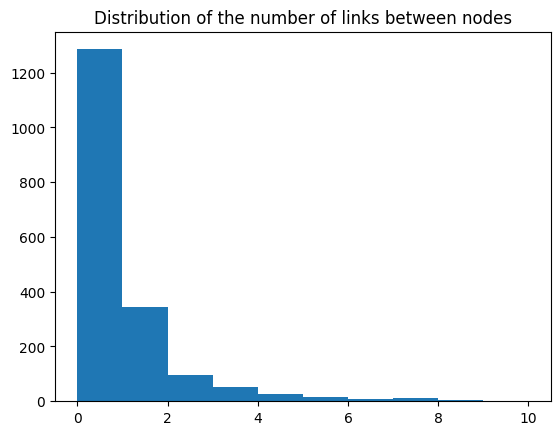

In [8]:
plt.hist(g_network.extract_link_matrix(prop=False).astype(int).flatten())
plt.title("Distribution of the number of links between nodes")
plt.show()

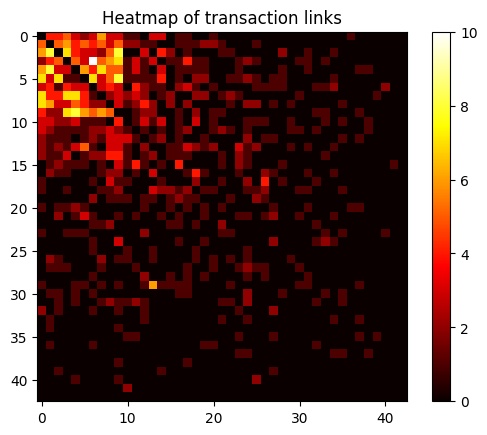

In [9]:
plt.imshow(g_network.extract_link_matrix(False), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of transaction links')
plt.show()

In [10]:
pd.Series(calculate_network_params(g_network.G))

Number of nodes        43.000000
Number of links       564.000000
Connectivity            0.312292
Reciprocity             0.503546
Average Degree (k)     26.232558
Max (k-in)             28.000000
Max (k-out)            25.000000
dtype: float64